In [1]:
import h5py
import numpy as np
import torch

In [2]:
hf = h5py.File('../spliceai_train_code/Canonical/dataset_train_all.h5', 'r')

Keys: X1 ~ X132, Y1 ~ Y132

In [11]:
hf.keys()

<KeysViewHDF5 ['X0', 'X1', 'X10', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X11', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X12', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X13', 'X130', 'X131', 'X132', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X2', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X3', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X4', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X5', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X6', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X7', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X8', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X9', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'Y0', 'Y1', 'Y10', 'Y100', 'Y10

In [6]:
torch.from_numpy(hf['X0'][:]).shape

torch.Size([5662, 5080, 4])

In [18]:
torch.from_numpy(hf['X0'][:])[0].float()

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.]])

In [5]:
torch.from_numpy(hf['Y0'][:]).shape

torch.Size([1, 5662, 5000, 3])

In sample set X0, there are 5662 samples with 5080bp, one-hot encoded (dim=4) sequences.

Y0 represents labels. Labels are assigned for core 5000bp, excluding flanking 40x2=80bp.

`[1, 0, 0]` represents "not-a-splice-site"

`[0, 1, 0]` represents splice acceptor (first nucleotide of the corresponding exon)

`[0, 0, 1]` represents splice donor (first nucleotide of the corresponding exon)

In [33]:
x = torch.from_numpy(hf['X3'][:]).float()
y = torch.from_numpy(hf['Y3'][:])

In [24]:
import matplotlib.pyplot as plt

In [35]:
x[0].shape

torch.Size([5080, 4])

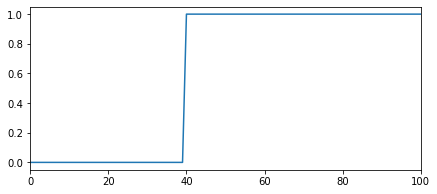

In [39]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(111)
ax.set_xlim([0, 100])

ax.plot(x[0].sum(axis=1))

In [34]:
(x[0].sum(axis=1) == 0).sum()

tensor(40)

In [40]:
y[0].shape

torch.Size([2943, 5000, 3])